# Train 10 Regression Models in a Single Pass

This notebook demonstrates the process of training multiple regression models with Scikit-Learn. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train = pd.read_csv('data/train.csv')

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing

We preprocess the data by One-Hot-Encoding all categorial features with pandas `get_dummies()` function. This dataset is a great opportunity for feature engineering, so feel free to do more preprocessing. 

For the ames housing data, this increases our feature space from 81 to 290, but is a critical step for most linear regression models. 

In [3]:
target = train.SalePrice
train = train.drop(['Id','SalePrice'], axis=1)

catagorical_feats = [i for i in train.columns.values if train[i].dtype == 'object']
numeric_feats = [i for i in train.columns.values if train[i].dtype != 'object']

In [4]:
from sklearn.preprocessing import StandardScaler

## One-Hot-Encoding
for cat in catagorical_feats:
    one_hot = pd.get_dummies(train[cat], prefix=cat)
    train = train.drop(cat, axis=1)
    train = pd.concat([train, one_hot], axis=1)

## Standard Scaler
train = train.fillna(-1.)

train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1459,20,75.0,9937,5,6,1965,1965,0.0,830,290,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train/Test Split

Nothing fancy here. Splitting the data 66/33 for training and validation and dropping the Id and SalePrice from the training set. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                                       train, target, test_size=0.33, random_state=23)

## 10 Regressor Loop

And now the fun part. Here we are looping over 10 different Scikit-Learn regressors and recording the results to a new pandas DataFrame. All hyperparamaters are left at the default. 

Each model is trained, then evaluated on Root Mean Squared Error, which is the evaluation metric used on Kaggle. 

In [6]:
from sklearn import linear_model, tree, svm, ensemble 

# List of 10 Regressor Objects
regressors = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.BayesianRidge(),
    linear_model.RANSACRegressor(),
    svm.SVR(),
    ensemble.GradientBoostingRegressor(),
    tree.DecisionTreeRegressor(),
    ensemble.RandomForestRegressor()
]

# Logging for Visual Comparison
log_cols=["Regressor", "RMSE Loss"]
log = pd.DataFrame(columns=log_cols)

for reg in regressors:
    reg.fit(X_train, y_train)
    name = reg.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    predictions = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("Root Mean Squared Error: {}".format(rmse))
    
    
    log_entry = pd.DataFrame([[name, rmse]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LinearRegression
****Results****
Root Mean Squared Error: 50782.07024167484
Ridge
****Results****
Root Mean Squared Error: 27981.974815142425
Lasso
****Results****
Root Mean Squared Error: 32053.82167430839
ElasticNet
****Results****
Root Mean Squared Error: 27021.468393431976
BayesianRidge
****Results****
Root Mean Squared Error: 32684.342821128273
RANSACRegressor
****Results****
Root Mean Squared Error: 33852.25126243786
SVR
****Results****
Root Mean Squared Error: 79937.91910073583
GradientBoostingRegressor
****Results****
Root Mean Squared Error: 23770.34654602159
DecisionTreeRegressor
****Results****
Root Mean Squared Error: 40111.5224956765
RandomForestRegressor
****Results****
Root Mean Squared Error: 27924.335042138453


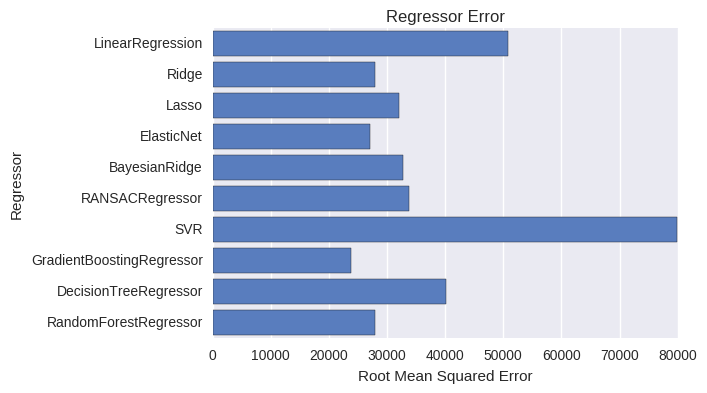

In [7]:
sns.set_color_codes("muted")
sns.barplot(x='RMSE Loss', y='Regressor', data=log, color="b")

plt.xlabel('Root Mean Squared Error')
plt.title('Regressor Error')
plt.show()

In [ ]:
And the Winner is...

GradientBoostingRegessor. No suprise here, Gradient Boosting is usually the best out-of-box solution. 